# predicting breast cancer


### importing modules

* pandas
* numpy
* matplotlib

reading "cancer.data" data using pandas module 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# reading "cancer.data" data using pandas module 
df_cancer = pd.read_csv("cancer.data", header=None)

### Observing DataFrame
using
* .head()
* .info()
* .isnull()
* .value_counts()

In [38]:
df_cancer.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [39]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [40]:
df_cancer.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [41]:
df_cancer[6].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: 6, dtype: int64

In [42]:
df_cancer[df_cancer.isnull()].count()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

looking at the dataframe head, the colomns seem to have interger values but the dataframe info says that all columns are interger except for column 6, which is object, the descriptive table doesn't show column 6,so from there i looked into column 6 where i found that there are unusual values.The data frame has no NaN values 

### Handle unusual values

* Replacing unusual values with np.Nan
* Imputing the np.Nan values with the mode value
* checking for missing values

In [43]:
df_cancer = df_cancer.replace('?',np.NaN)

In [44]:
for col in df_cancer:
    # Check if the column is of object type
    if df_cancer[col].dtypes == 'object':
        # Impute with the most frequent value
        df_cancer = df_cancer.fillna(df_cancer[col].value_counts().index[0])
        
# Count the number of NaNs in the dataset and print the counts to verify
df_cancer[df_cancer.isnull()].count().sum()

0

### transforming
converting none numeric values to numeric values using LabelEncoder

In [45]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df_cancer:
    # Compare if the dtype is object
    if df_cancer[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        df_cancer[col]=le.fit_transform(df_cancer[col])

### Exploring Data

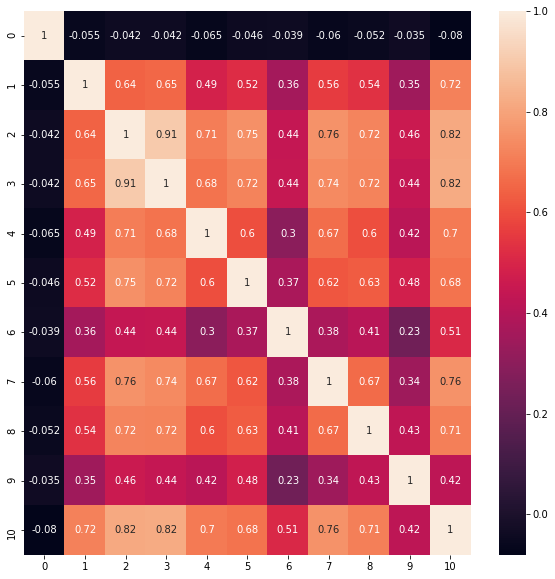

In [46]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_cancer.corr(), annot=True)
plt.show()

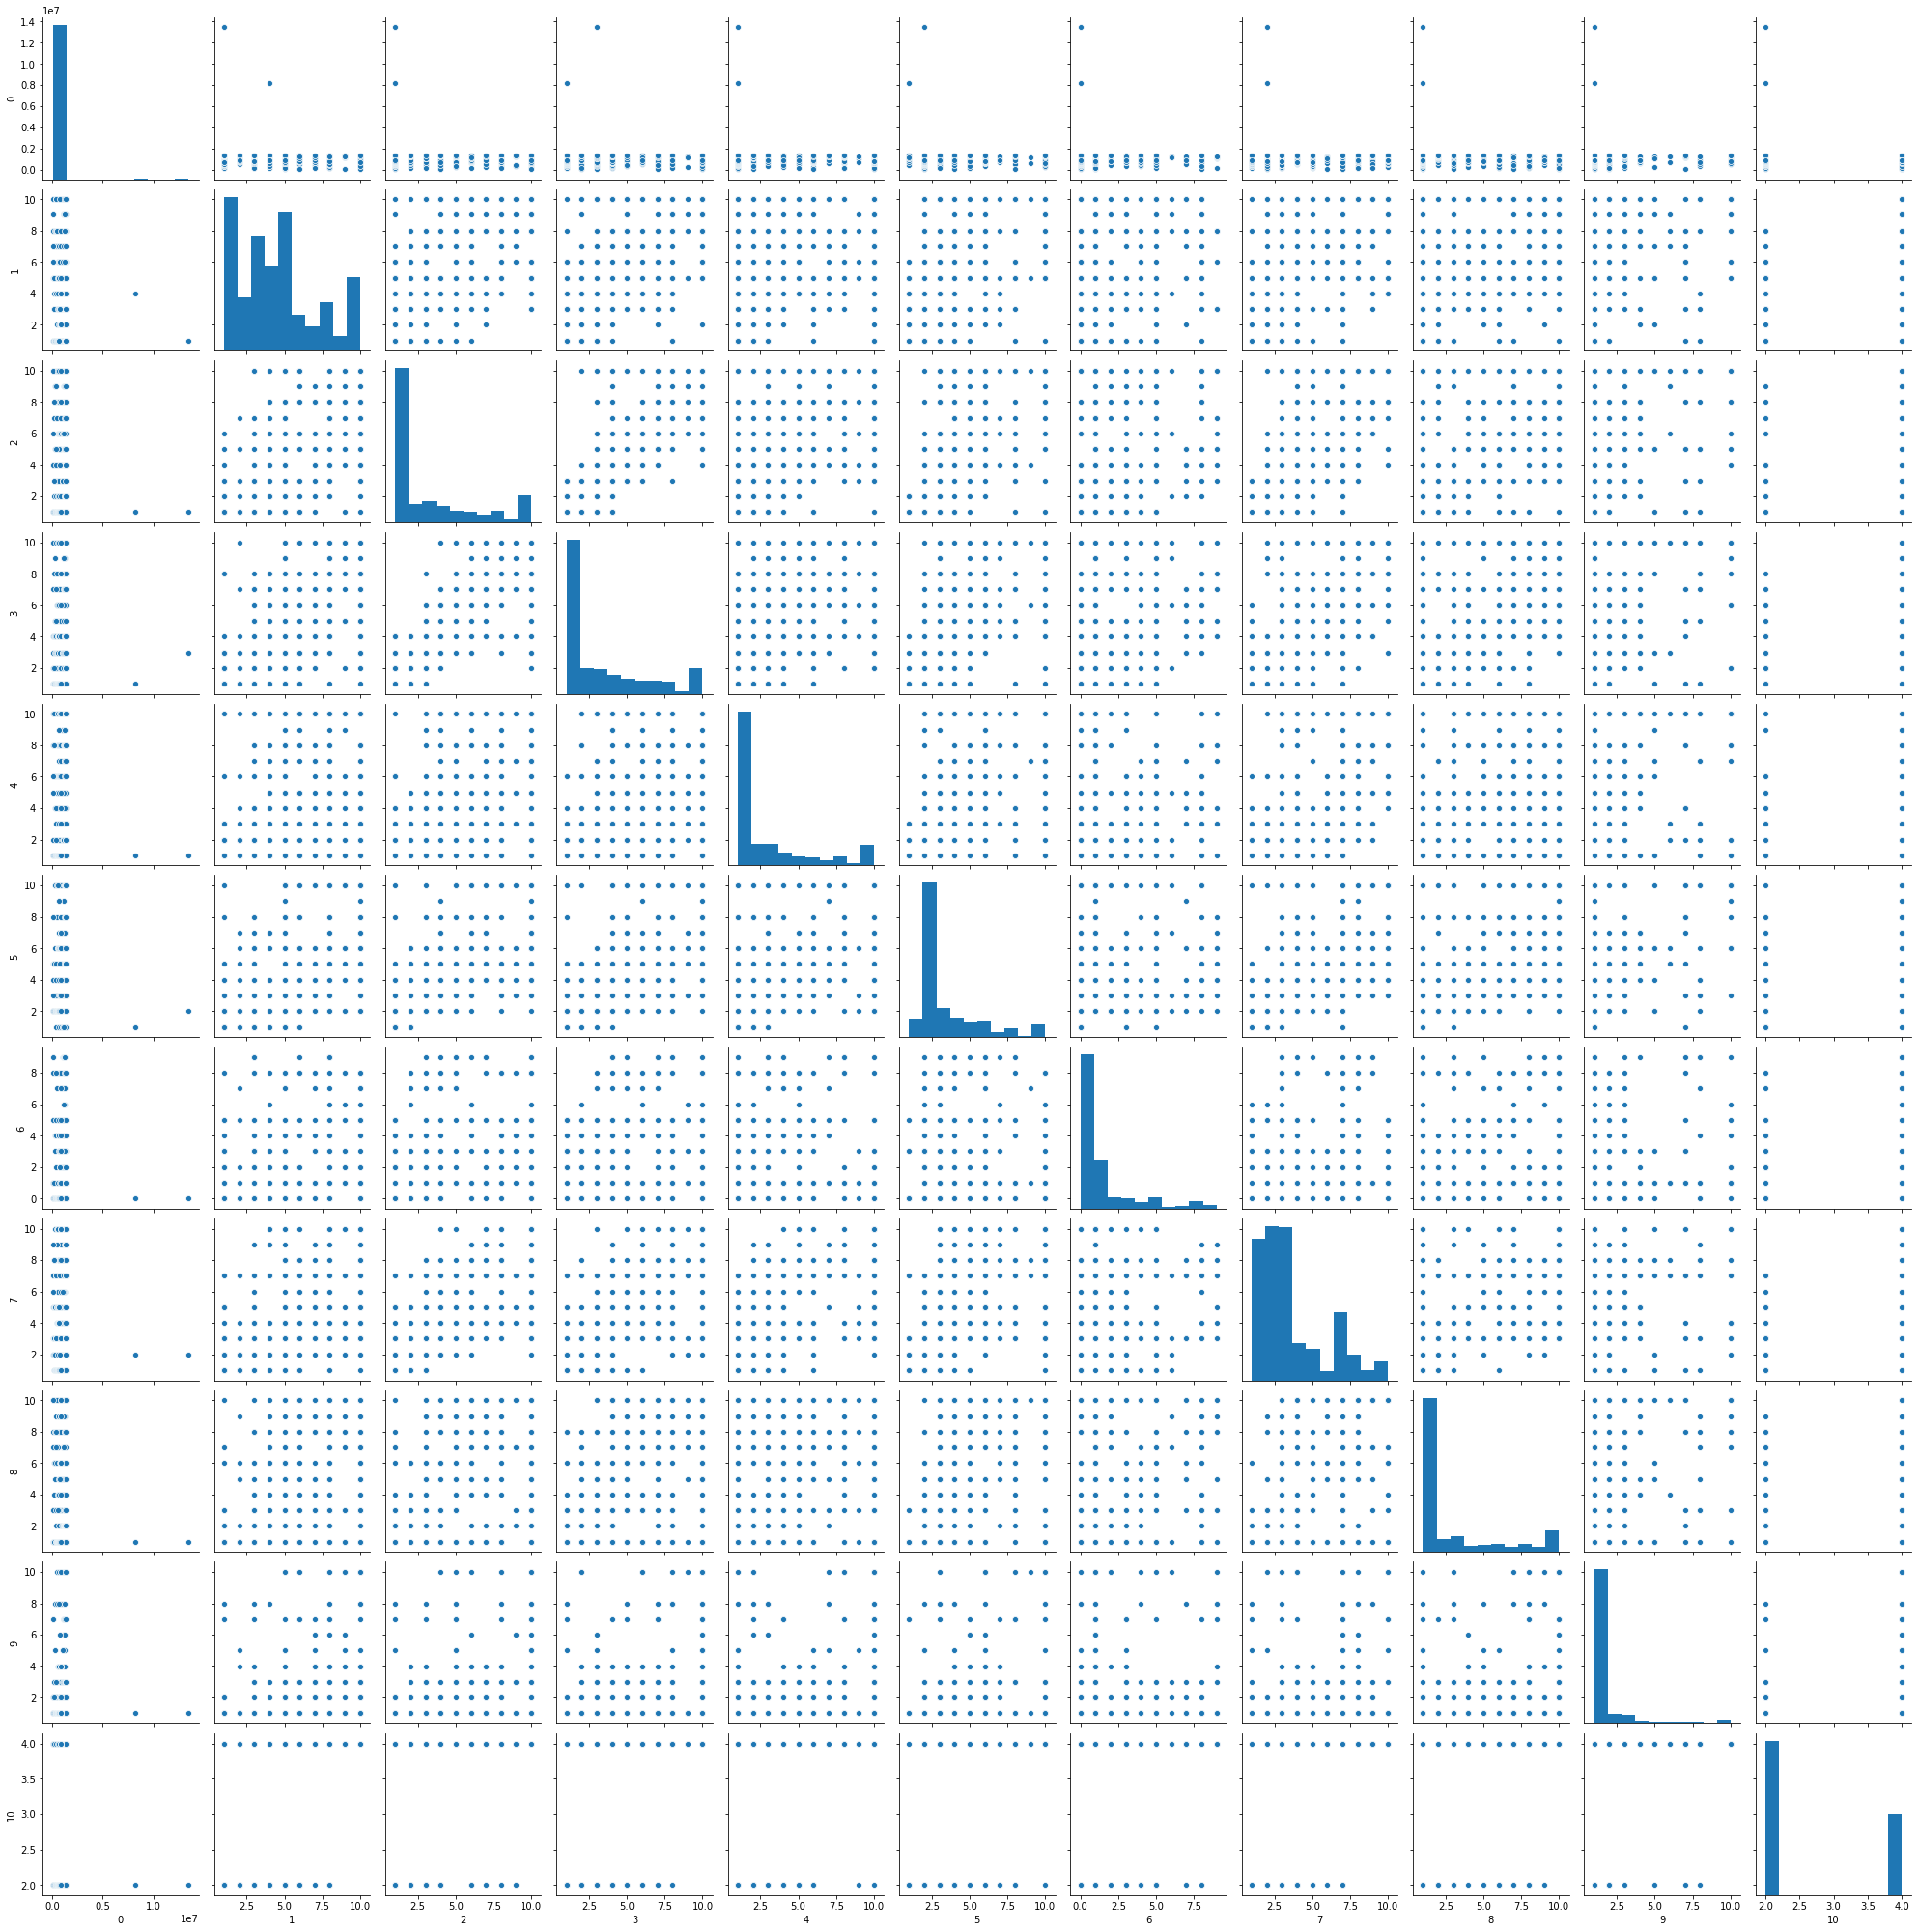

In [11]:
sns.pairplot(df_cancer)
plt.show()

### splitting data
* Converting DataFrame to Numpy array
* Segregate features and labels into separate variables
* Using sklearn.model_selection 'train_test_split'
* Scaling splitted data 'X_train and X_test'

In [47]:
types={
    2:-1,
    4:1
}
df_cancer[10] = df_cancer[10].map(types)

In [48]:
from sklearn.model_selection import train_test_split
df_cance = df_cancer.values
X,y = df_cance[:,0:9] , df_cance[:,10]
X_trainm, X_testm, y_trainm, y_testm = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

In [49]:
import statsmodels.api as sm
model= sm.OLS(y_trainm, X_trainm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.516
Model:                            OLS   Adj. R-squared (uncentered):              0.506
Method:                 Least Squares   F-statistic:                              54.37
Date:                Sun, 05 Apr 2020   Prob (F-statistic):                    7.71e-67
Time:                        02:22:45   Log-Likelihood:                         -494.26
No. Observations:                 468   AIC:                                      1007.
Df Residuals:                     459   BIC:                                      1044.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -4.804e-07   3.62e-08    -13.272      0.000   -5.52e-07   -4.09e-07
x2            -0.0298      0.014     -2.122      0.034      -0.057      -0.002
x3             0.0996      0.029      3.453      0.001       0.043       0.156
x4             0.1048      0.029      3.672      0.000       0.049       0.161
x5             0.0295      0.017      1.712      0.088      -0.004       0.063
x6            -0.0834      0.021     -3.954      0.000      -0.125      -0.042
x7             0.0697      0.017      4.103      0.000       0.036       0.103
x8            -0.0369      0.022     -1.685      0.093      -0.080       0.006
x9             0.0455      0.017      2.698      0.007       0.012       0.079
==============================================================================
Omnibus:                      236.756   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2260.638
Skew:                           1.971   Prob(JB):                         0.00
Kurtosis:                      13.019   Cond. No.                     1.49e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### features with p-value > 0.05
* feature 8
* feature 5

these are the feature to be dropped

In [50]:
# droping features
# df_cancer = df_cancer.drop([0,5,8], axis=1)
df_cancer

,1,2,3,4,6,7,9,10
0,5,1,1,1,0,3,1,-1
1,5,4,4,5,1,3,1,-1
2,3,1,1,1,2,3,1,-1
3,6,8,8,1,4,3,1,-1
4,4,1,1,3,0,3,1,-1
...,...,...,...,...,...,...,...,...
694,3,1,1,1,2,1,1,-1
695,2,1,1,1,0,1,1,-1
696,5,10,10,3,3,8,2,1
697,4,8,6,4,4,10,1,1


In [51]:
df_cancer = df_cancer.values
X,y = df_cance[:,0:7] , df_cance[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

In [52]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [53]:
### Creating model using sklearn.linear_model "LogisticRegression"

In [54]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(random_state=0)

# Fit logreg to the train set
model = logreg.fit(rescaledX_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_testpred = logreg.predict(rescaledX_test)
y_trainpred =logreg.predict(rescaledX_train)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_testpred))
print('/n')

Accuracy of logistic regression classifier:  0.6753246753246753
[[140   0   0   0   1   0   0   0   0   6]
 [  9   0   0   0   0   0   0   0   0   1]
 [  9   0   0   0   0   0   0   0   0   5]
 [  6   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0   3]
 [  3   0   0   0   0   0   0   0   0   3]
 [  4   0   0   0   1   0   0   0   0   4]
 [  1   0   0   0   0   0   0   0   0   3]
 [  7   0   0   0   0   0   0   0   0  16]]
/n


In [56]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [57]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.679538 using {'max_iter': 100, 'tol': 0.01}


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_testpred))
print('/n')
print(classification_report(y_train,y_trainpred))

              precision    recall  f1-score   support

           1       0.74      0.95      0.84       147
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         4
          10       0.39      0.70      0.50        23

    accuracy                           0.68       231
   macro avg       0.11      0.16      0.13       231
weighted avg       0.51      0.68      0.58       231

/n
              precision    recall  f1-score   support

           1       0.78      0.97      0.87       296
           2       0.00      0.00      0.00        26
           3       0.33      0.17      0.22        30
           4       0.

/home/mrmfene/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.569


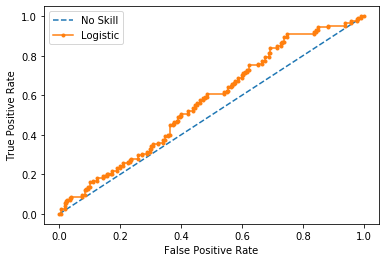

In [59]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
X, y = df_cance[:,0:9] , df_cance[:,10]
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


TypeError: confusion_matrix() missing 2 required positional arguments: 'y_true' and 'y_pred'